In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, callbacks
import tensorflow as tf
import numpy as np
import signalnet as sn
import pandas as pd

2023-04-26 03:23:07.998822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("data/testsetallwaves_sr22050.csv")
df = df.loc[:80000,:]

In [3]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up_new(X_train, X_test, y_train, y_test)

9
(39990, 9)


In [5]:
y_train_update = []

for i in y_train:
    y_train_update.append(i[-1])

y_train = np.array(y_train_update)

y_test_update = []

for i in y_test:
    y_test_update.append(i[-1])

y_test = np.array(y_test_update)

In [6]:
X_train.shape

(39990, 9)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [8]:
model = keras.Sequential()

2023-04-26 03:23:10.764099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-26 03:23:10.768838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-26 03:23:10.769121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-26 03:23:10.771655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-26 03:23:10.771960: I tensorflow/compile

In [9]:
model.add(layers.LSTM(15,input_shape=(1,9)))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.compile(loss="mean_squared_error",optimizer ="adam", metrics=["mean_absolute_percentage_error", "cosine_proximity"], )


2023-04-26 03:23:20.832524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 03:23:20.834266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 03:23:20.835354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15)                1500      
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,677
Trainable params: 3,677
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train,y_train,epochs=50,batch_size=5,validation_split=0.05, callbacks=[callbacks.EarlyStopping(monitor="loss")])

Epoch 1/50


2023-04-26 03:23:21.362641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 03:23:21.364451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 03:23:21.365924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7594/7598 [============================>.] - ETA: 0s - loss: 0.0074 - mean_absolute_percentage_error: 7271.7314 - cosine_proximity: 0.0063

2023-04-26 03:24:23.796839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 03:24:23.798665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 03:24:23.800138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7598/7598 [==============================] - 65s 8ms/step - loss: 0.0074 - mean_absolute_percentage_error: 7268.1348 - cosine_proximity: 0.0061 - val_loss: 0.0238 - val_mean_absolute_percentage_error: 111.9088 - val_cosine_proximity: 0.1040
Epoch 2/50
7598/7598 [==============================] - 60s 8ms/step - loss: 0.0074 - mean_absolute_percentage_error: 6845.4907 - cosine_proximity: -0.0020 - val_loss: 0.0238 - val_mean_absolute_percentage_error: 131.8854 - val_cosine_proximity: 0.1040
Epoch 3/50
7598/7598 [==============================] - 58s 8ms/step - loss: 0.0074 - mean_absolute_percentage_error: 7128.6572 - cosine_proximity: 0.0127 - val_loss: 0.0237 - val_mean_absolute_percentage_error: 215.3976 - val_cosine_proximity: 0.1040
Epoch 4/50
7598/7598 [==============================] - 58s 8ms/step - loss: 0.0074 - mean_absolute_percentage_error: 5918.6748 - cosine_proximity: -0.0018 - val_loss: 0.0240 - val_mean_absolute_percentage_error: 160.2652 - val_cosine_proximity: -0.1040


KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X_test)

1250/1250 [==============================] - 2s 895us/step


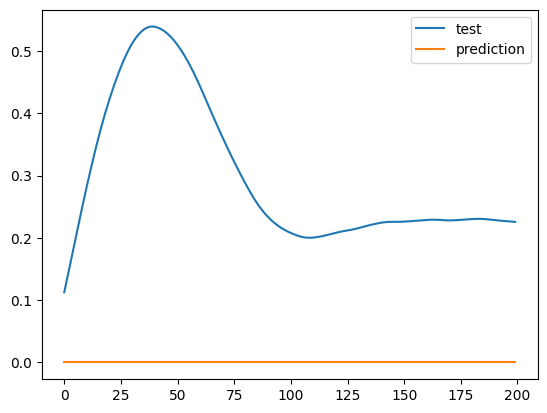

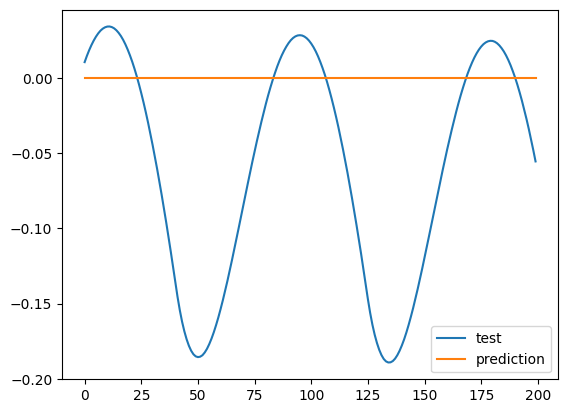

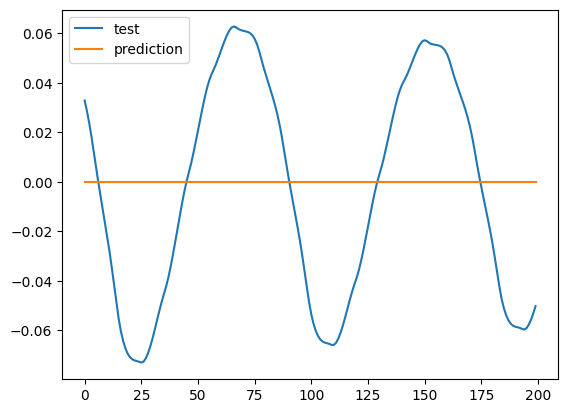

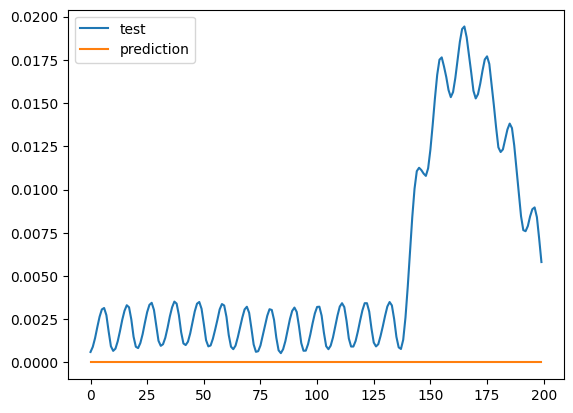

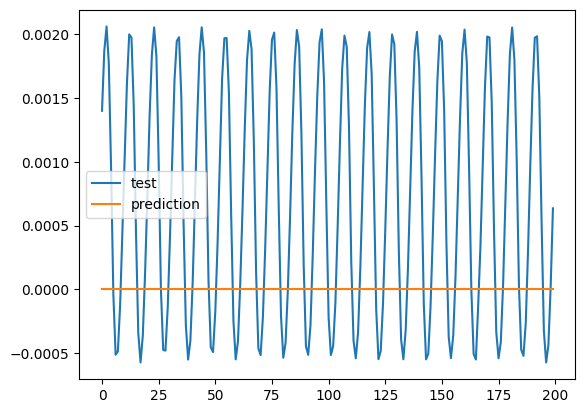

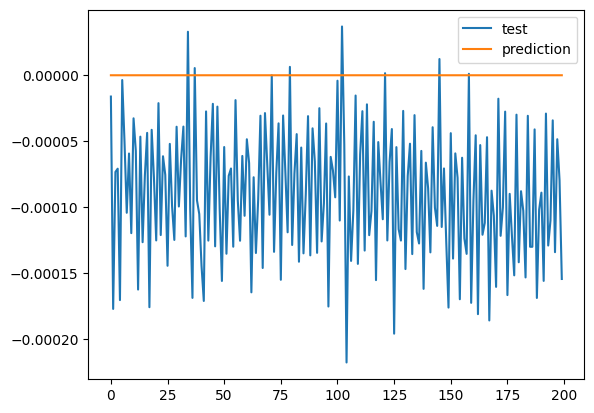

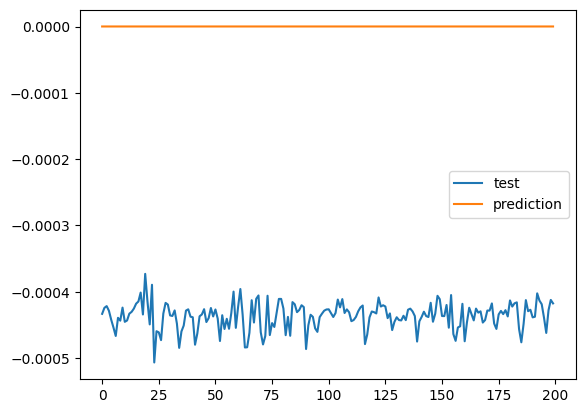

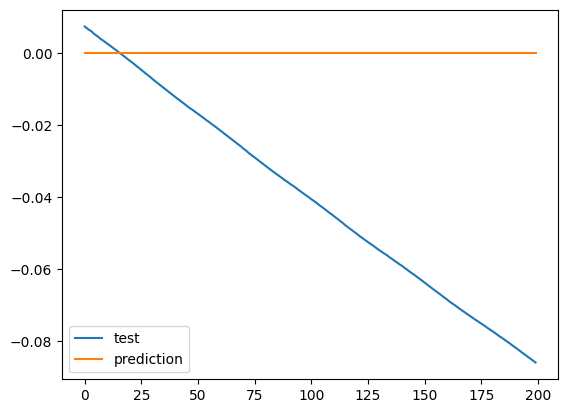

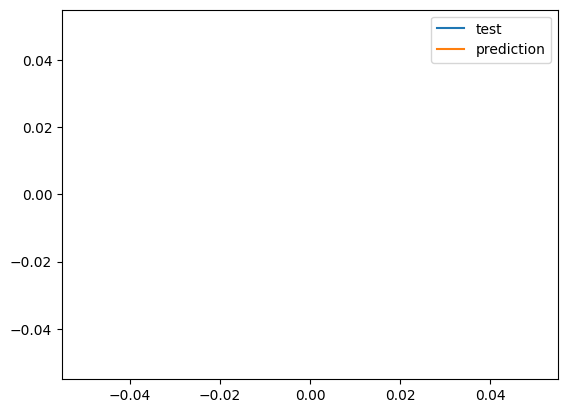

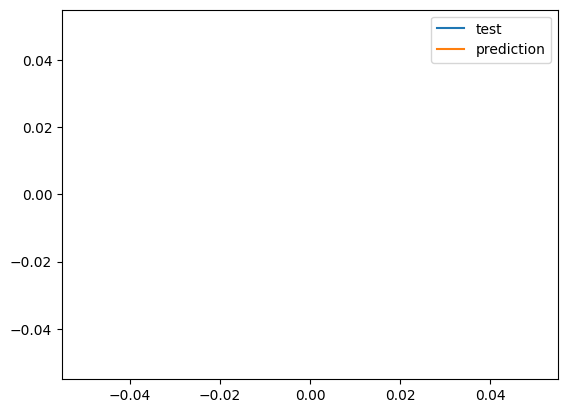

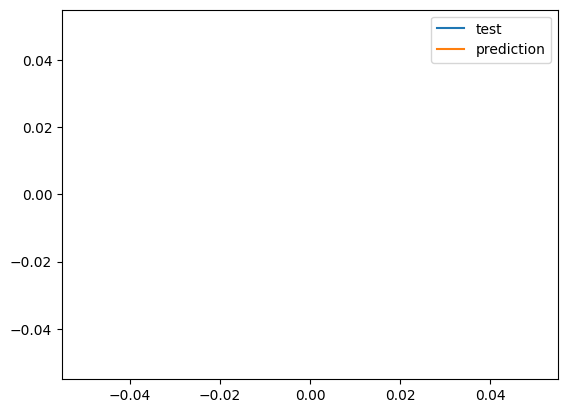

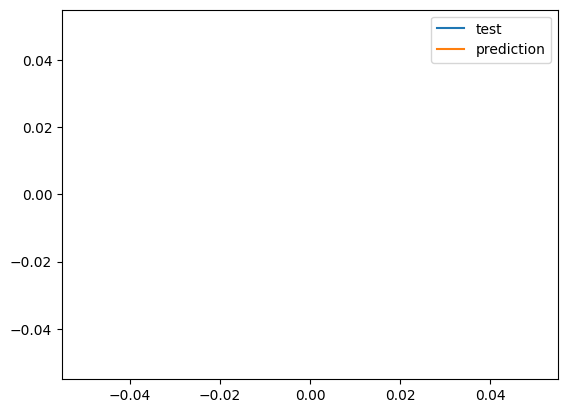

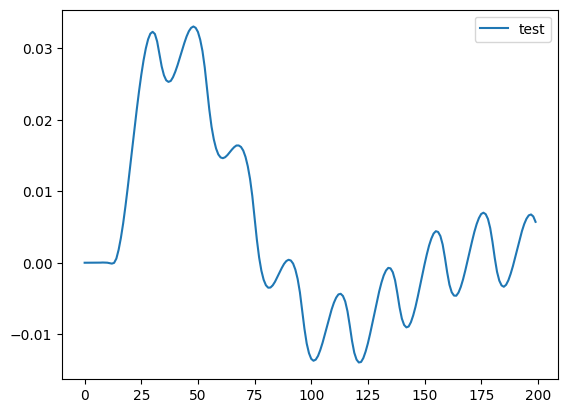

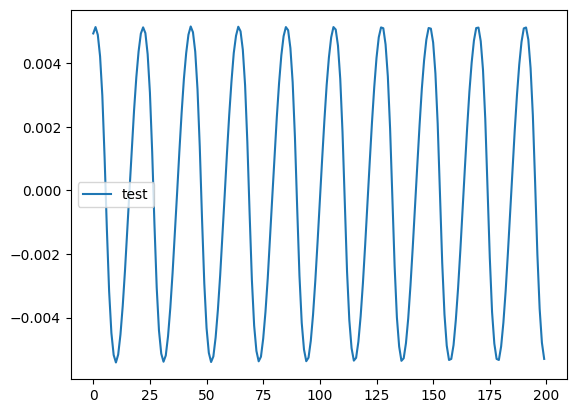

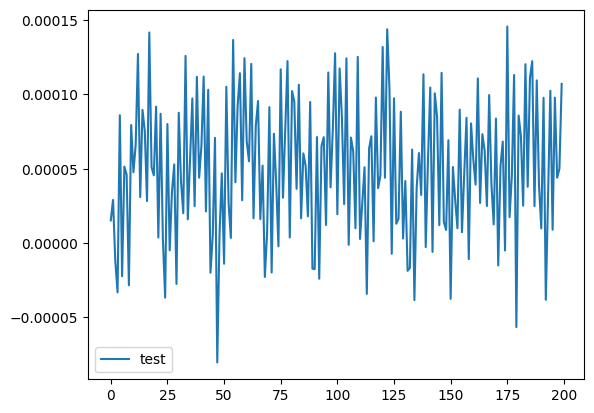

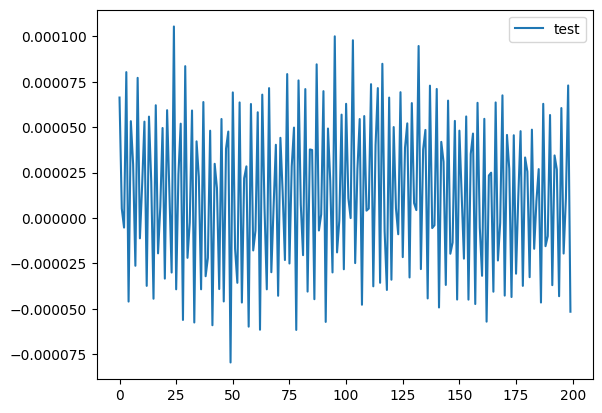

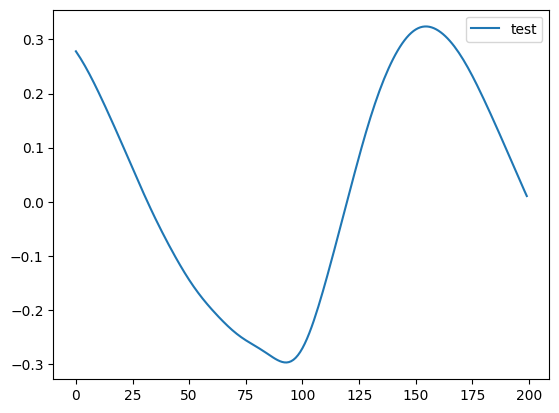

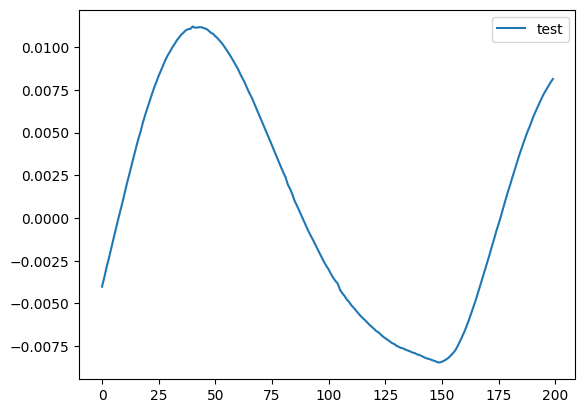

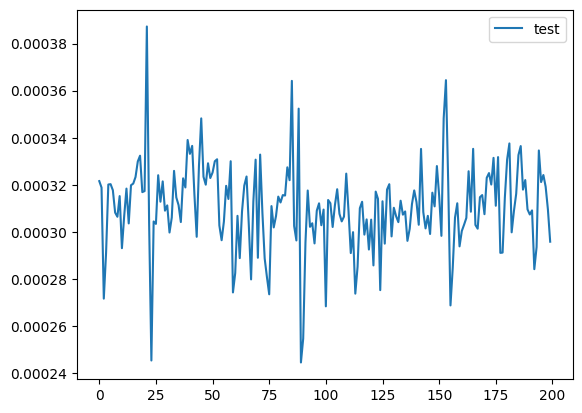

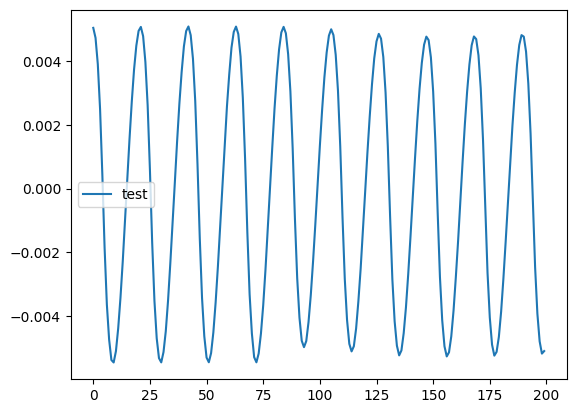

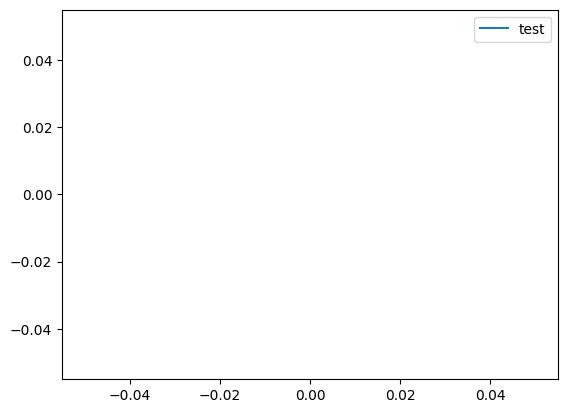

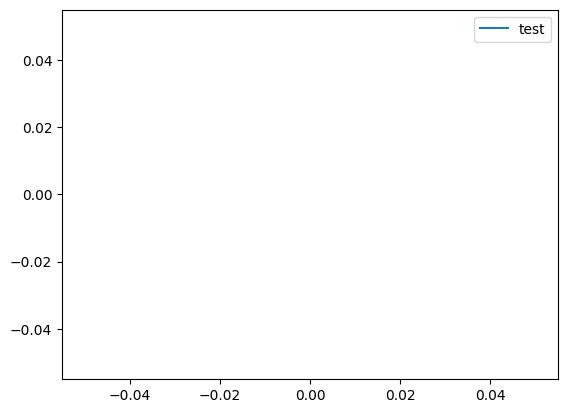

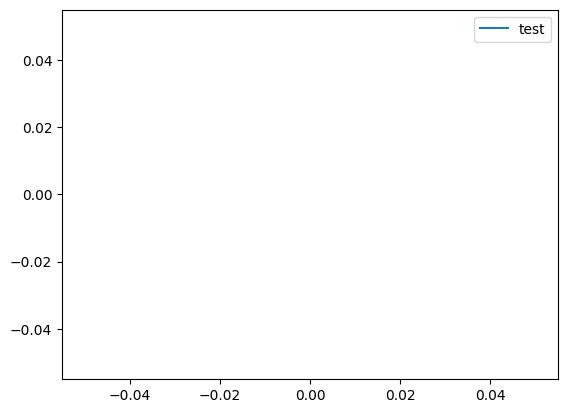

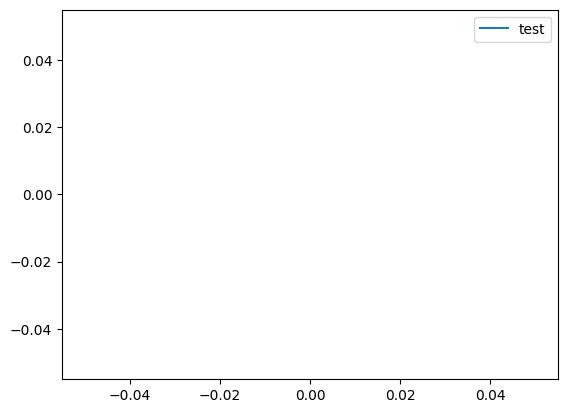

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, 60000, 5000):
    plt.plot(y_test[i:i+200], label="test")
    plt.plot(predictions.flatten()[i:i+200], label="prediction")
    plt.legend()
    plt.show()
    plt.clf()

for i in range(0, 60000, 5000):
    plt.plot(y_train[i:i+200], label="test")
    plt.legend()
    plt.show()
    plt.clf()


In [ ]:
errors = []
for idx, item in enumerate(y_test):
    errors.append(np.square(item-predictions.flatten()[idx]))

mse = sum(errors)/len(errors)

In [ ]:
mse

0.011384642027766711